

# Project: Medical Appointment No Shows
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

Questions:

Does Show rate differs by gender? males may have higher probability of show up due to social norms that constricts the movement of women.
How the scholarship affects the probability of show up? those who were eligible for the scholarship may have shown up more often because the are able to afford the costs or because the fear of loosing the scholarship.
AppointmentDay: How delay affects show up?

In [1]:
# import statements
from numpy import * 
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


link of the dataset  <a href="https://www.kaggle.com/joniarroba/noshowappointments">Medical Appointment No Shows</a>



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = read_csv ('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#display number of rows and columns
df.shape

(110527, 14)

In [4]:
#check if there is any misssing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

In [5]:
#check if there is any duplicated values
df.drop_duplicates(inplace =True)
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing values or duplicates¶


In [7]:
DataFrame({"min":df.min(), "max":df.max()})

,min,max
PatientId,39217.8,9.99982e+14
AppointmentID,5030230,5790484
Gender,F,M
ScheduledDay,2015-11-10T07:13:56Z,2016-06-08T20:07:23Z
AppointmentDay,2016-04-29T00:00:00Z,2016-06-08T00:00:00Z
Age,-1,115
Neighbourhood,AEROPORTO,VILA RUBIM
Scholarship,0,1
Hipertension,0,1
Diabetes,0,1


Age can not be -1

In [8]:
df[df["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
#drop it and check
df.drop(99832, inplace = True)
df[df["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
#drop the unused features

df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [11]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis





In [12]:
noShow=df[df['No-show'] == "Yes"]

In [13]:
attended=df[df['No-show'] == "No"]

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

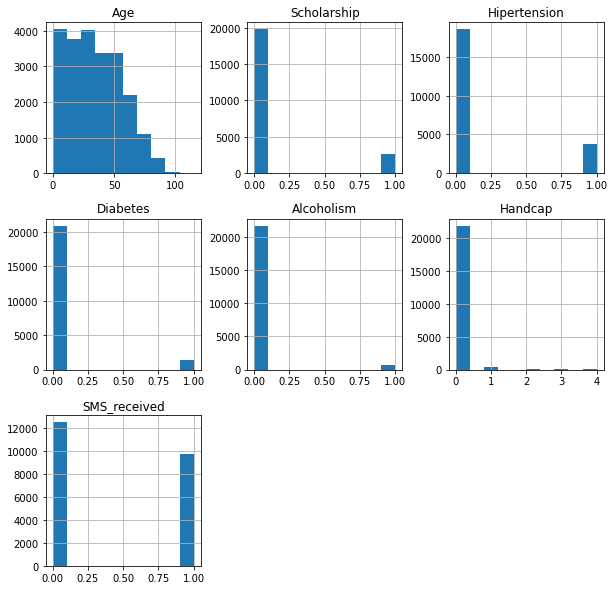

In [14]:
noShow.hist(figsize=(10,10))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

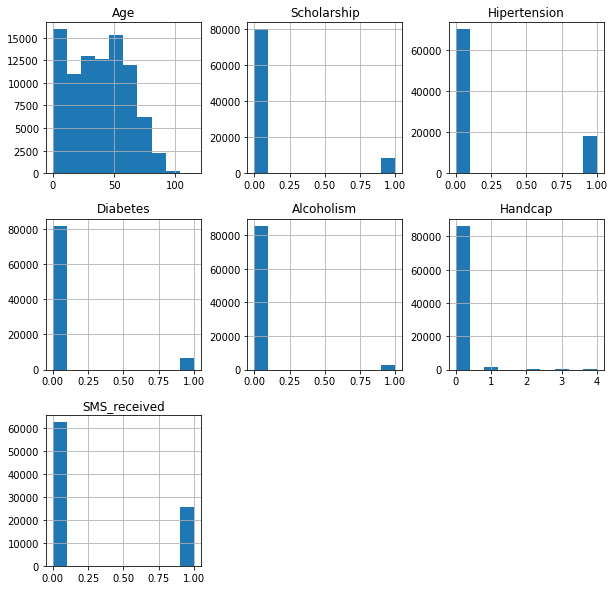

In [15]:
attended.hist(figsize=(10,10))

## Research Question 1  How  the SMS received attribute effects showing up?


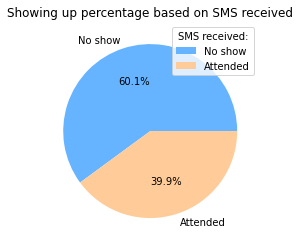

In [16]:
y = array([noShow['SMS_received'].mean()*100, attended['SMS_received'].mean()*100])
mylabels = ["No show", "Attended"]
colors = ['#66b3ff','#ffcc99']
plt.pie(y,labels = mylabels, colors=colors, autopct='%1.1f%%')
plt.legend(title = "SMS received:")
plt.title("Showing up percentage based on SMS received")


plt.show() 

### Around 60% of people who received SMS did not show

## Research Question 2 What are the ages of no-shows and shows?¶


C:\Users\96654\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\96654\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


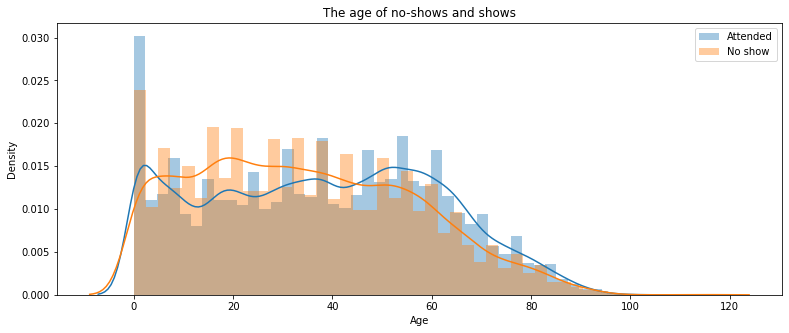

In [17]:
plt.figure(figsize=(13,5))
sns.distplot(attended['Age'], label='Attended')
sns.distplot(noShow['Age'], label='No show')
plt.legend()
plt.title("The age of no-shows and shows")
plt.show()

### People in general tend to not show to their appointments untill early 40s. As they get older they start to attend  appointments 

## Research Question 3 How many people of each gender did show?? 


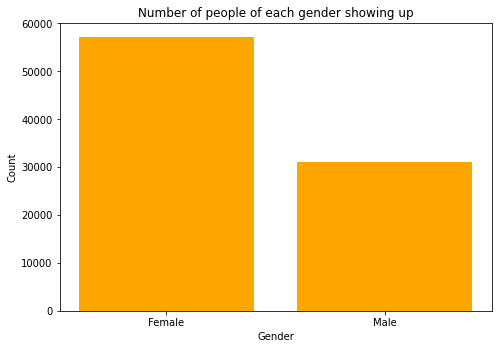

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

attend = ['Female', 'Male']
number = [(attended['Gender']=='F').sum(),(attended['Gender']=='M').sum()]
ax.bar(attend,number, color='orange')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')

ax.set_title('Number of people of each gender showing up')
plt.show()

In [19]:
(attended['Gender']=='F').value_counts()

True     57245
False    30962
Name: Gender, dtype: int64

### Up to 57245 females have attended thier appointments which is more than males

## Research Question 4 How many people with a scholarship did no-show?

In [20]:
(attended['Scholarship']==1).sum()

8283

In [21]:
(noShow['Scholarship']==1).sum()

2578

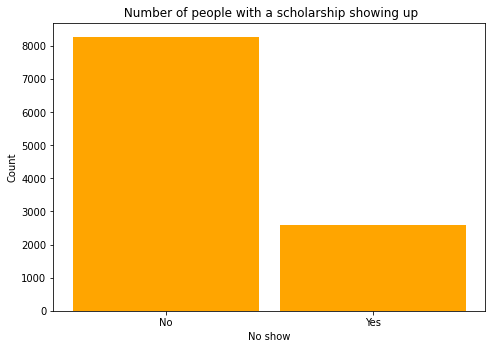

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

Scholarship = ['No', 'Yes']
number = [(attended['Scholarship']==1).sum(),(noShow['Scholarship']==1).sum()]
ax.bar(Scholarship,number, width=0.9, color='orange')
ax.set_ylabel('Count')
ax.set_xlabel('No show')
ax.set_title(' Number of people with a scholarship showing up')
plt.show()


### People with scholarships are more likely to attend their appointments and that is clear from the numbers of people who have attended in the bar chart. Reaching up to 8283 attendees

## Research Question 5 Neighbourhood with the highest no-show?



In [23]:
noShow['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

<AxesSubplot:title={'center':'Neighbourhoods with the highest number of no show'}, xlabel='Neighbourhoods', ylabel='Count'>

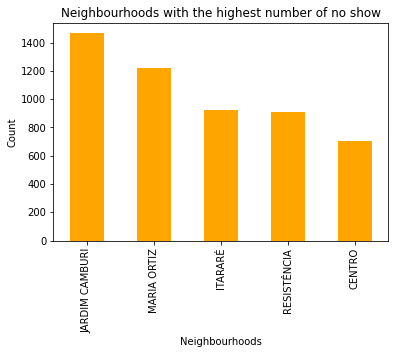

In [24]:
noShow['Neighbourhood'].value_counts().head().plot(kind='bar', color ='orange', title= 'Neighbourhoods with the highest number of no show', ylabel='Count', xlabel='Neighbourhoods')


### JARDIM CAMBURI followed by MARIA ORTIZ have the higtest number of no shows with 1465 and 1219 respectively

## Research Question 6 What percentage of men and women who have scholarships, diabetes, drinks alcohol, and have no-show?

In [25]:
q4=noShow[noShow['Scholarship'] == 1]

In [26]:
q4=q4[q4['Diabetes'] == 1]

In [27]:
q4=q4[q4['Alcoholism'] == 1]

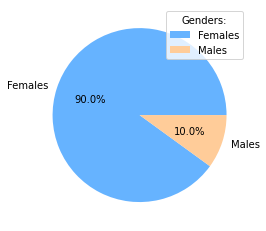

In [28]:
a4 = array([(q4['Gender']=='F').mean(), (q4['Gender']=='M').mean()])
mylabels = ["Females", "Males"]
colors = ['#66b3ff','#ffcc99']

plt.pie(a4,labels = mylabels, colors=colors, autopct='%1.1f%%')
plt.legend(title = "Genders:")

plt.show() 

### 90% of women who have scholarships, diabetes, and drinks alcohol did not show

<a id='conclusions'></a>
## Conclusions

<ul>
<li>Around 60% of people who received SMS did not show</li>
<li>People in general tend to not show to their appointments untill early 40s. As they get older they start to attend  appointments s</li>
<li>Up to 57245 females have attended thier appointments which is more than males</li>
<li>People with scholarships are more likely to attend their appointments and that is clear from the numbers of people who have attended in the bar chart. Reaching up to 8283 attendees </li>
<li>JARDIM CAMBURI followed by MARIA ORTIZ have the higtest number of no shows with 1465 and 1219 respectively</li>
<li>90% of women who have scholarships, diabetes, and drinks alcohol did not show</li>
</ul>


## Limitations

<ul>
<li>The dataset contains negative values for age which can be fixed by putting restrictions for the age input field</li>
<li>It would be more sufficient if there is a column of the specific day of the week the appointment is scheduled instead of just DD/MM?YYYY format. Where it can be easier to see what day of the week people tend to not show</li>
</ul>

